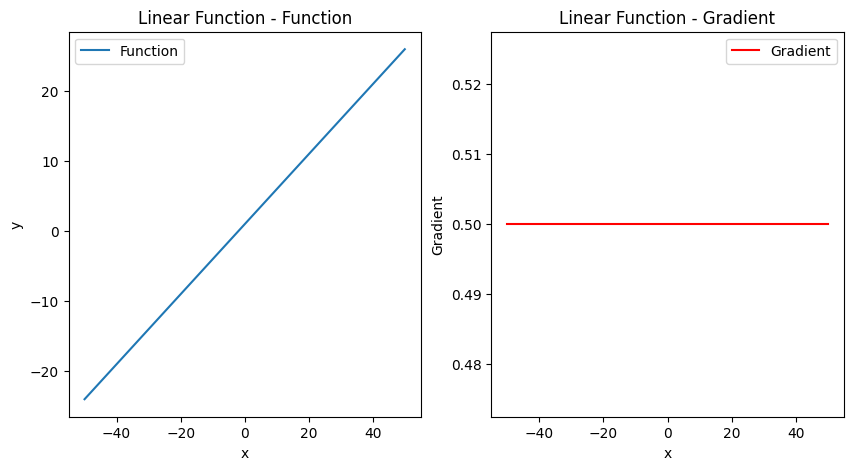

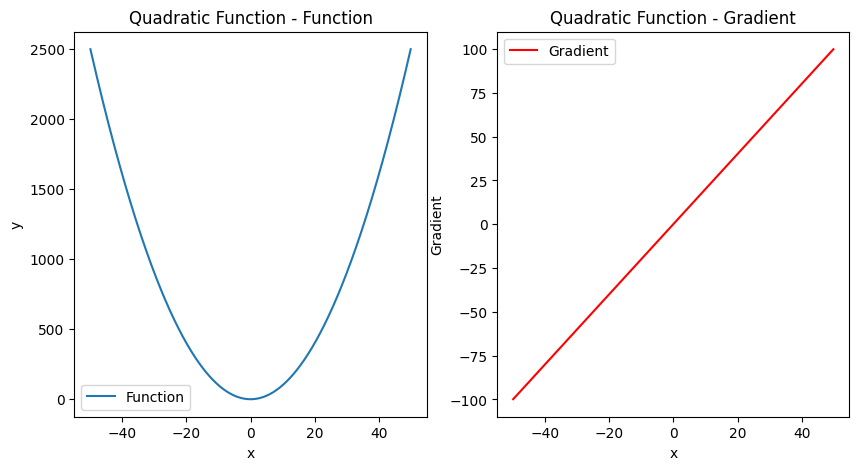

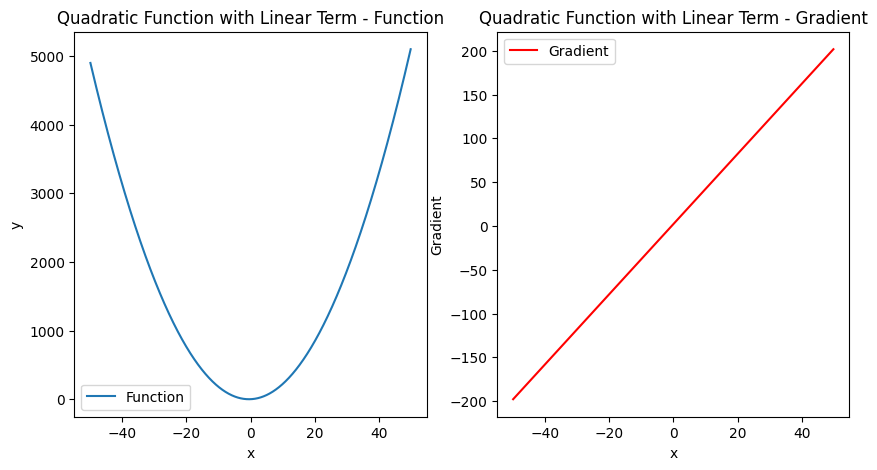

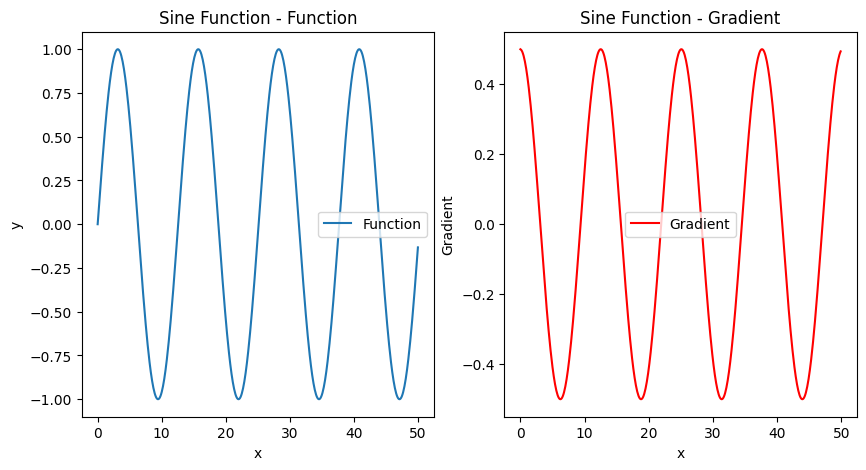

Minimum values:
Quadratic Function: Min value at x=7.105427357601002e-13, y=5.048709793414476e-25, gradient before=0.009999999999858176, gradient after=0.010000000000142393
Quadratic + Linear Function: Min value at x=-0.49999999999929656, y=-0.5, gradient before=0.019999999999719242, gradient after=0.02000000000028196
Sine Function: Min value at x=22.0, y=-0.9999902065507035, gradient before=0.0010285346568865705, gradient after=0.0014709200746580997


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Compute the gradient using finite differences.
    
    Parameters
    ----------------
    function : function
      The function for which the gradient is calculated.
    x_range : tuple
      Range of x values defined as (start, stop, step) for np.arange().
    
    Returns
    ----------------
    array_xy : ndarray, shape (n, 2)
      Concatenated x and y values.
    gradient : ndarray, shape (n-1,)
      The gradient values.
    """
    x = np.arange(*x_range)
    y = function(x)
    
    array_xy = np.column_stack((x, y))
    gradient = np.diff(y) / np.diff(x)  # Compute numerical gradient
    
    return array_xy, gradient

def function1(x):
    return 0.5 * x + 1

def function2(x):
    return x**2

def function3(x):
    return 2 * x**2 + 2 * x

def function4(x):
    return np.sin(x / 2)

# Compute gradients
array_xy1, gradient1 = compute_gradient(function1)
array_xy2, gradient2 = compute_gradient(function2)
array_xy3, gradient3 = compute_gradient(function3)
array_xy4, gradient4 = compute_gradient(function4, (0, 50.1, 0.1))

# Plot functions and gradients
def plot_function_and_gradient(x, y, gradient, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, y, label='Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{title} - Function')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x[:-1], gradient, label='Gradient', color='r')
    plt.xlabel('x')
    plt.ylabel('Gradient')
    plt.title(f'{title} - Gradient')
    plt.legend()
    
    plt.show()

plot_function_and_gradient(array_xy1[:,0], array_xy1[:,1], gradient1, 'Linear Function')
plot_function_and_gradient(array_xy2[:,0], array_xy2[:,1], gradient2, 'Quadratic Function')
plot_function_and_gradient(array_xy3[:,0], array_xy3[:,1], gradient3, 'Quadratic Function with Linear Term')
plot_function_and_gradient(array_xy4[:,0], array_xy4[:,1], gradient4, 'Sine Function')

# Find the minimum value of each function
def find_minimum(function, x_range):
    x = np.arange(*x_range)
    y = function(x)
    min_index = np.argmin(y)
    min_x = x[min_index]
    min_y = y[min_index]
    gradient_before = None if min_index == 0 else y[min_index - 1] - y[min_index]
    gradient_after = None if min_index == len(y) - 1 else y[min_index + 1] - y[min_index]
    return min_x, min_y, gradient_before, gradient_after

print("Minimum values:")
for func, name in zip([function2, function3, function4], 
                      ['Quadratic Function', 'Quadratic + Linear Function', 'Sine Function']):
    min_x, min_y, grad_before, grad_after = find_minimum(func, (-50, 50.1, 0.1) if func != function4 else (0, 50.1, 0.1))
    print(f"{name}: Min value at x={min_x}, y={min_y}, gradient before={grad_before}, gradient after={grad_after}")
